## Pontifícia Universidade Católica de São Paulo 

## `Ciência de Dados e Inteligência Artificial`

### “Churn” de clientes em uma empresa de telecomunicações

---
>*Aluno: Kevin egidio de Toledo (ra00280590@pucsp.edu.br)*
---
> *RA: 00282590*
---



### Instalando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

### importando o CSV

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Tratamento dos dados

Observando o tipo dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Aqui foi utilizado o método `Factorize` para que a padronização dos dados, somente algumas colunas que dependem de valores unicos eu não utilizei o factorize.

In [4]:
for col in df.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1):
    df[col], col = df[col].factorize()

 Após uma breve análise, descobri que os valores vazio não estão como `'NaN'` e sim como ' ', então para arrumar isso e poder utilizar o Pandas para tratar esses dados, eu substitui todos os valores vazios por 'NaN'.

In [5]:
for col in df.columns:
    df[col] = df[col].replace([' '], np.NaN)

 Podemos observar que a coluna `TotalCharges` está com 11 valores nulos

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 Com a ferramenta `fillna()` e com o parametro `method=backfill` eu defini que para cada dado igual a 'NaN' ele substituiria o valor para um valor igual ao dado anterior.

In [7]:
df['TotalCharges'] = df.TotalCharges.fillna(method='backfill',inplace=False) 

 agora após rodar nosso código, nós conseguimos retirar os valores nulos do dataset,como podemos ver no código a seguir

In [8]:
df['TotalCharges'].isnull().sum()

0

 Agora, nós iremos, transformar os valores que estão como object em float, para ver, basta utilizar o comando  `info`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


 Podemos observar que o `TotalCharges` está como object, agora iremo mudá-lo para `int` e mudaremos o `MonthlyCharges` para `int` tambem, após isso utilizaremos o comando `info` novamente para ver se está tudo certo.

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')

 Como podemos ver todos os valores como `object` foram subtituidas


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


 Nosso objetivo na parte de tratamento está pronto, os valores vazios foram substituidos, os types foram trocados por números e todos os dados foram padronizados pelo factorize, agora iremos começar com a parte da criação do modelo DecisionTree

## Criação do DecisionTree

 Para começar, primeiro, devemos separar o target(X) e as features(y), logo após isso seprar em treino e teste.


###### Separando X e y, Features e Target.

In [12]:
X = df.drop(columns=['Churn','customerID'])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60


In [13]:
y = df[['Churn']]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


###### Separando em treino e teste.

In [14]:
X_treino, X_teste, y_treino, y_teste =  train_test_split(X, y, test_size=0.20)

Agora que separamos em treino e teste iremos confirmar se a soma do `X_treino + X_teste` dois irá ser igual a soma do` X`.

In [15]:
len(X_treino+X_teste) == len(X)

True

###### Criando o classificador

 Após separamos em X, y e Logo em seguida separar em treino e teste, nós iremos começar a montar e treinar nosso classificador.

 Colocando o critério do classificador como `entropy` e o classificador `DecisionTreeClassifier` dentro da váriavel `decisionTree`, nosso classificador está pronto, agora só falta treinar e usar ele.

In [16]:
decisionTree = DecisionTreeClassifier()

###### Treinando o modelo

In [17]:
model = decisionTree.fit(X_treino,y_treino)

 Aqui podemos observar que nosso score foi consideralvelmente bom.

In [18]:
model.score(X_teste, y_teste)

0.7246273953158269

###### Plotando a Matrix de confusão

 Ao plotar uma matrix de confusão com o matplot, podemos perceber que ela ficou mais dinâmica e facil de cisualziar e entender.

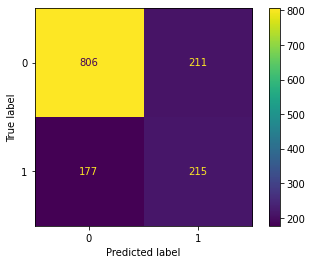

In [19]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model, X_teste, y_teste)


## visualização dos dados

#### Com a ajuda do pandas, matplot, seaborn e nosso classificador, iremos tentar criar respostas para ajudar a empresa a diminuir o churn

In [20]:
model.feature_importances_

array([0.02068063, 0.01785504, 0.0280129 , 0.02041288, 0.10640273,
       0.00071734, 0.02000692, 0.01658202, 0.04793728, 0.02269267,
       0.01040761, 0.01720697, 0.01100998, 0.01586028, 0.16967815,
       0.02975878, 0.0427912 , 0.20881216, 0.19317448])

Podemos observar que a coluna `Contract`, `MonthlyCharges` e `TotalCharges` são as mais importantes, então iremos criar a visualização em cima delas


<AxesSubplot:xlabel='Contract', ylabel='Churn'>

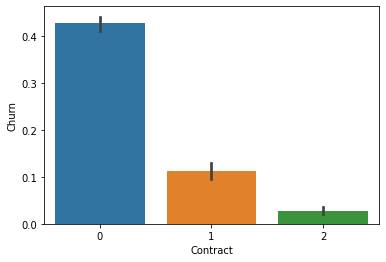

In [21]:
sns.barplot(x='Contract',y='Churn', data=df)

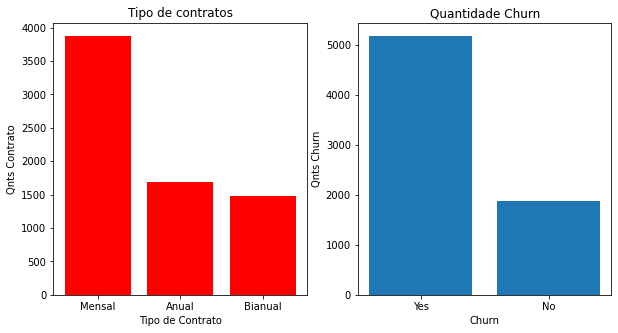

In [22]:
contract = [int(x) for x in X['Contract'].value_counts()]
tipo_contract = ['Mensal','Anual','Bianual']
churn = ['Yes', 'No']
churn_qnts = [int(x) for x in y['Churn'].value_counts()]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(tipo_contract,contract, color='r')
ax2.bar(churn,churn_qnts)


ax1.set(title="Tipo de contratos", xlabel='Tipo de Contrato', ylabel='Qnts Contrato');
ax2.set(title="Quantidade Churn",xlabel='Churn', ylabel='Qnts Churn');



df

In [23]:
df[['Contract','Churn']].value_counts()

Contract  Churn
0         0        2220
          1        1655
2         0        1647
1         0        1307
          1         166
2         1          48
dtype: int64

In [24]:
sim = []
nao = []
teste = df[['Contract','Churn']].value_counts()
for i in range(3):
    for j in range(2):   
        if j == 0:
            nao.append(teste[i][j])
        if j == 1:
            sim.append(teste[i][j])


In [25]:
churn = sim
n_churn = nao

barwidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(churn))
r2 = [x+barwidth for x in r1]

<Figure size 720x360 with 0 Axes>

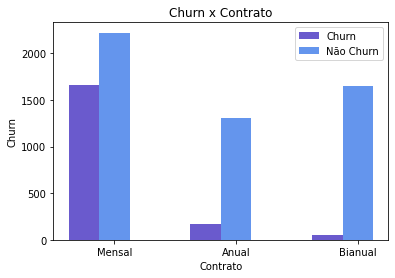

In [26]:
plt.bar(r1, churn, color='#6A5ACD', width=barwidth, label='Churn')
plt.bar(r2, n_churn, color='#6495ED', width=barwidth, label='Não Churn')

plt.xlabel('Contrato')

plt.xticks([r + barwidth for r in range(len(churn))], ['Mensal','Anual','Bianual'])
plt.ylabel('Churn')
plt.title('Churn x Contrato')

plt.legend()
plt.show()

In [32]:
porc_0 = (1655*100)/3875
porc_0

42.70967741935484

Pelo que podemos observar a quantidade de churn em contratos a curto prazo é muito maior que a quantidade de churn em contratos a longo prazo.